Random Node Removal

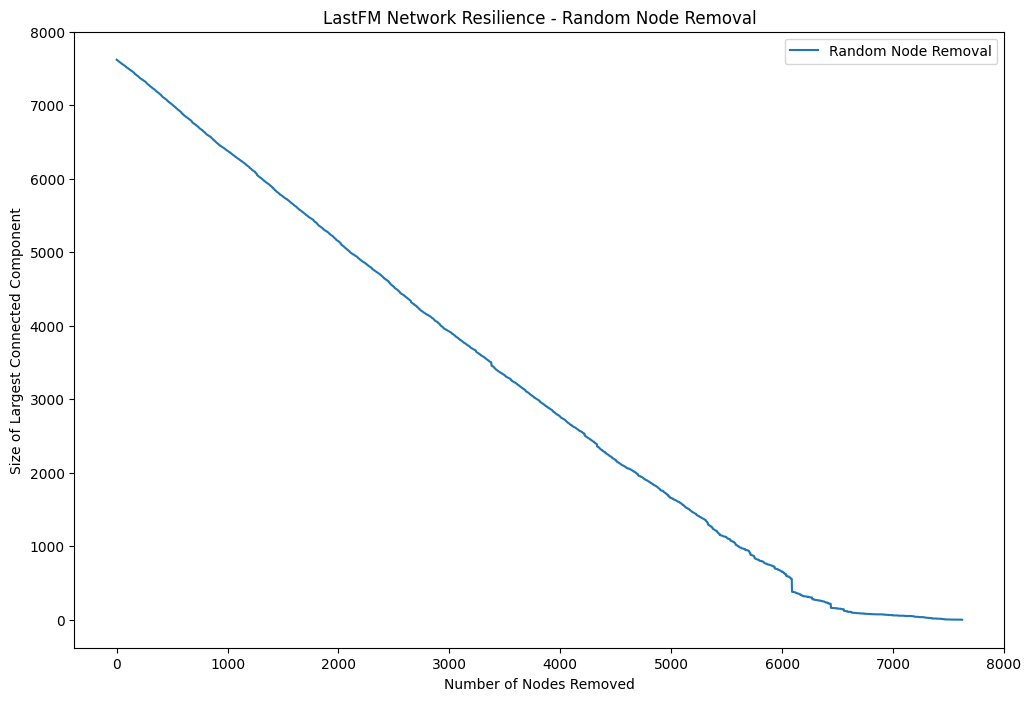

In [9]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def random_node_removal(graph):
    nodes = list(graph.nodes())
    random.shuffle(nodes)
    largest_cc_size = []
    for node in nodes:
        graph.remove_node(node)
        if nx.number_connected_components(graph) > 0:
            largest_cc = max(nx.connected_components(graph), key=len)
            largest_cc_size.append(len(largest_cc))
        else:
            largest_cc_size.append(0)  # If the graph is completely disconnected
    return largest_cc_size

# Load the preprocessed LastFM graph
lastfm_graph = nx.read_gml('data/lastfm_graph.gml')

# Compute resilience for random node removal
random_removal_resilience_lastfm = random_node_removal(lastfm_graph.copy())

# Plotting the resilience
plt.figure(figsize=(12, 8))
plt.plot(random_removal_resilience_lastfm, label='Random Node Removal')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Size of Largest Connected Component')
plt.title('LastFM Network Resilience - Random Node Removal')
plt.legend()
plt.show()


Generating Models

In [10]:
import networkx as nx

# Load the preprocessed LastFM graph
lastfm_graph = nx.read_gml('data/lastfm_graph.gml')

# Generate the Chung-Lu model
degree_sequence = [degree for node, degree in lastfm_graph.degree()]
chung_lu_model_lastfm = nx.expected_degree_graph(degree_sequence, selfloops=False)

# Generate the Barabasi-Albert (BA) model
n = lastfm_graph.number_of_nodes()
m = int(sum(degree_sequence) / n)  # Average degree
ba_model_lastfm = nx.barabasi_albert_graph(n, m)

# Generate the UPA (Power-Law Cluster) model
p = 0.1  # Probability of adding a triangle after adding a random edge
upa_model_lastfm = nx.powerlaw_cluster_graph(n, m, p)

# Save the models
nx.write_gml(chung_lu_model_lastfm, 'data/chung_lu_model_lastfm.gml')
nx.write_gml(ba_model_lastfm, 'data/ba_model_lastfm.gml')
nx.write_gml(upa_model_lastfm, 'data/upa_model_lastfm.gml')


Highest Degree Node Removal

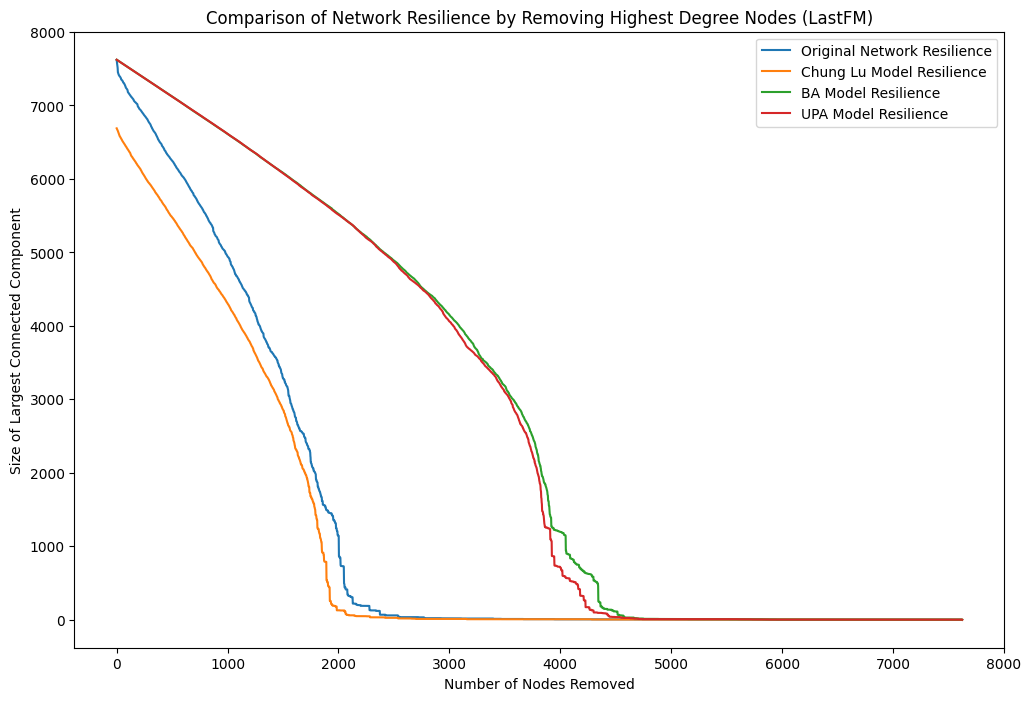

In [11]:
import matplotlib.pyplot as plt

def highest_degree_node_removal(graph):
    nodes_sorted_by_degree = sorted(graph.degree, key=lambda x: x[1], reverse=True)
    largest_cc_size = []
    for node, _ in nodes_sorted_by_degree:
        graph.remove_node(node)
        if nx.number_connected_components(graph) > 0:
            largest_cc = max(nx.connected_components(graph), key=len)
            largest_cc_size.append(len(largest_cc))
        else:
            largest_cc_size.append(0)  # If the graph is completely disconnected
    return largest_cc_size

# Load the preprocessed LastFM graph
lastfm_graph = nx.read_gml('data/lastfm_graph.gml')

# Load the synthetic models
chung_lu_model_lastfm = nx.read_gml('data/chung_lu_model_lastfm.gml')
ba_model_lastfm = nx.read_gml('data/ba_model_lastfm.gml')
upa_model_lastfm = nx.read_gml('data/upa_model_lastfm.gml')

# Compute resilience for highest degree node removal
highest_degree_resilience_lastfm = highest_degree_node_removal(lastfm_graph.copy())
highest_degree_resilience_chung_lu_lastfm = highest_degree_node_removal(chung_lu_model_lastfm.copy())
highest_degree_resilience_ba_lastfm = highest_degree_node_removal(ba_model_lastfm.copy())
highest_degree_resilience_upa_lastfm = highest_degree_node_removal(upa_model_lastfm.copy())

# Plotting the resilience
plt.figure(figsize=(12, 8))
plt.plot(highest_degree_resilience_lastfm, label='Original Network Resilience')
plt.plot(highest_degree_resilience_chung_lu_lastfm, label='Chung Lu Model Resilience')
plt.plot(highest_degree_resilience_ba_lastfm, label='BA Model Resilience')
plt.plot(highest_degree_resilience_upa_lastfm, label='UPA Model Resilience')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Size of Largest Connected Component')
plt.title('Comparison of Network Resilience by Removing Highest Degree Nodes (LastFM)')
plt.legend()
plt.show()


Strategic Node Addition (Degree Centrality)

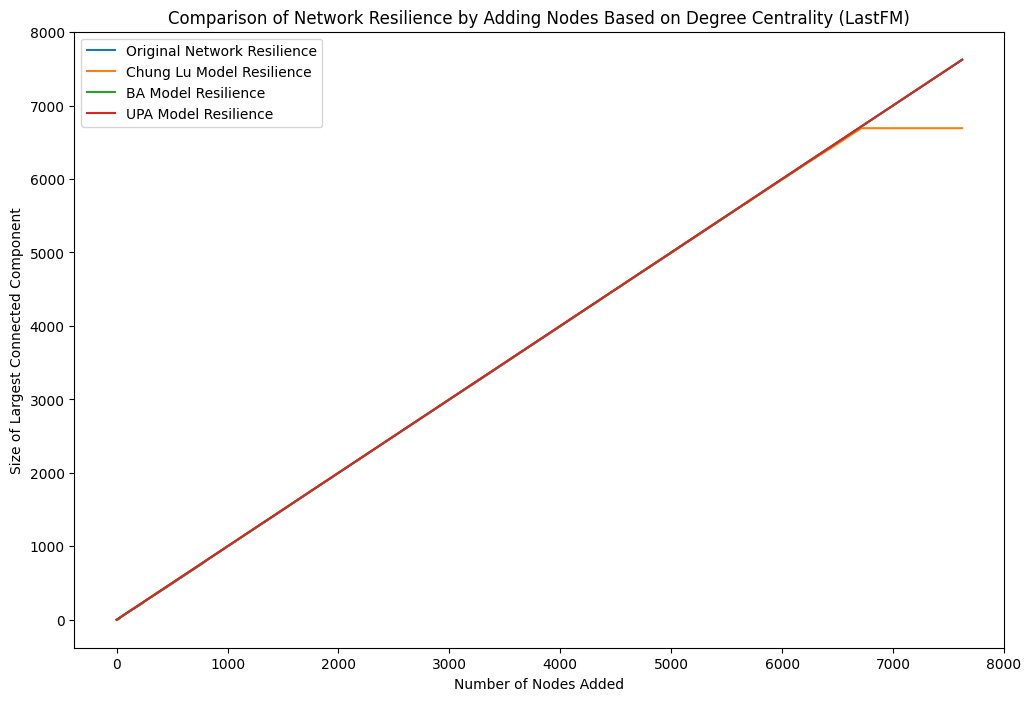

In [12]:
def degree_centrality_node_addition(graph, target_graph):
    nodes_sorted_by_degree = sorted(graph.degree, key=lambda x: x[1], reverse=True)
    largest_cc_size = []
    for node, _ in nodes_sorted_by_degree:
        target_graph.add_node(node)
        for neighbor in graph.neighbors(node):
            if target_graph.has_node(neighbor):
                target_graph.add_edge(node, neighbor)
        if nx.number_connected_components(target_graph) > 0:
            largest_cc = max(nx.connected_components(target_graph), key=len)
            largest_cc_size.append(len(largest_cc))
        else:
            largest_cc_size.append(0)  # If the graph is completely disconnected
    return largest_cc_size

# Compute resilience for degree centrality node addition
degree_addition_resilience_lastfm = degree_centrality_node_addition(lastfm_graph.copy(), nx.Graph())
degree_addition_resilience_chung_lu_lastfm = degree_centrality_node_addition(chung_lu_model_lastfm.copy(), nx.Graph())
degree_addition_resilience_ba_lastfm = degree_centrality_node_addition(ba_model_lastfm.copy(), nx.Graph())
degree_addition_resilience_upa_lastfm = degree_centrality_node_addition(upa_model_lastfm.copy(), nx.Graph())

# Plotting the resilience
plt.figure(figsize=(12, 8))
plt.plot(degree_addition_resilience_lastfm, label='Original Network Resilience')
plt.plot(degree_addition_resilience_chung_lu_lastfm, label='Chung Lu Model Resilience')
plt.plot(degree_addition_resilience_ba_lastfm, label='BA Model Resilience')
plt.plot(degree_addition_resilience_upa_lastfm, label='UPA Model Resilience')
plt.xlabel('Number of Nodes Added')
plt.ylabel('Size of Largest Connected Component')
plt.title('Comparison of Network Resilience by Adding Nodes Based on Degree Centrality (LastFM)')
plt.legend()
plt.show()


Strategic Node Addition (Betweenness Centrality)

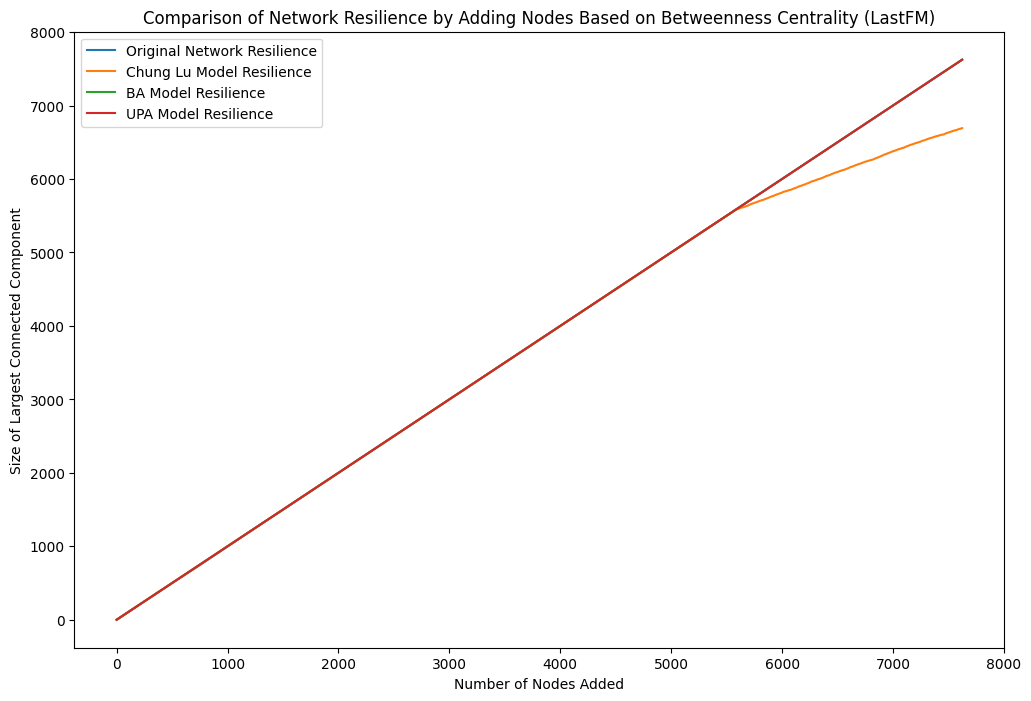

In [13]:
def betweenness_centrality_node_addition(graph, target_graph):
    betweenness_centrality = nx.betweenness_centrality(graph)
    nodes_sorted_by_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
    largest_cc_size = []
    for node, _ in nodes_sorted_by_betweenness:
        target_graph.add_node(node)
        for neighbor in graph.neighbors(node):
            if target_graph.has_node(neighbor):
                target_graph.add_edge(node, neighbor)
        if nx.number_connected_components(target_graph) > 0:
            largest_cc = max(nx.connected_components(target_graph), key=len)
            largest_cc_size.append(len(largest_cc))
        else:
            largest_cc_size.append(0)  # If the graph is completely disconnected
    return largest_cc_size

# Compute resilience for betweenness centrality node addition
betweenness_addition_resilience_lastfm = betweenness_centrality_node_addition(lastfm_graph.copy(), nx.Graph())
betweenness_addition_resilience_chung_lu_lastfm = betweenness_centrality_node_addition(chung_lu_model_lastfm.copy(), nx.Graph())
betweenness_addition_resilience_ba_lastfm = betweenness_centrality_node_addition(ba_model_lastfm.copy(), nx.Graph())
betweenness_addition_resilience_upa_lastfm = betweenness_centrality_node_addition(upa_model_lastfm.copy(), nx.Graph())

# Plotting the resilience
plt.figure(figsize=(12, 8))
plt.plot(betweenness_addition_resilience_lastfm, label='Original Network Resilience')
plt.plot(betweenness_addition_resilience_chung_lu_lastfm, label='Chung Lu Model Resilience')
plt.plot(betweenness_addition_resilience_ba_lastfm, label='BA Model Resilience')
plt.plot(betweenness_addition_resilience_upa_lastfm, label='UPA Model Resilience')
plt.xlabel('Number of Nodes Added')
plt.ylabel('Size of Largest Connected Component')
plt.title('Comparison of Network Resilience by Adding Nodes Based on Betweenness Centrality (LastFM)')
plt.legend()
plt.show()


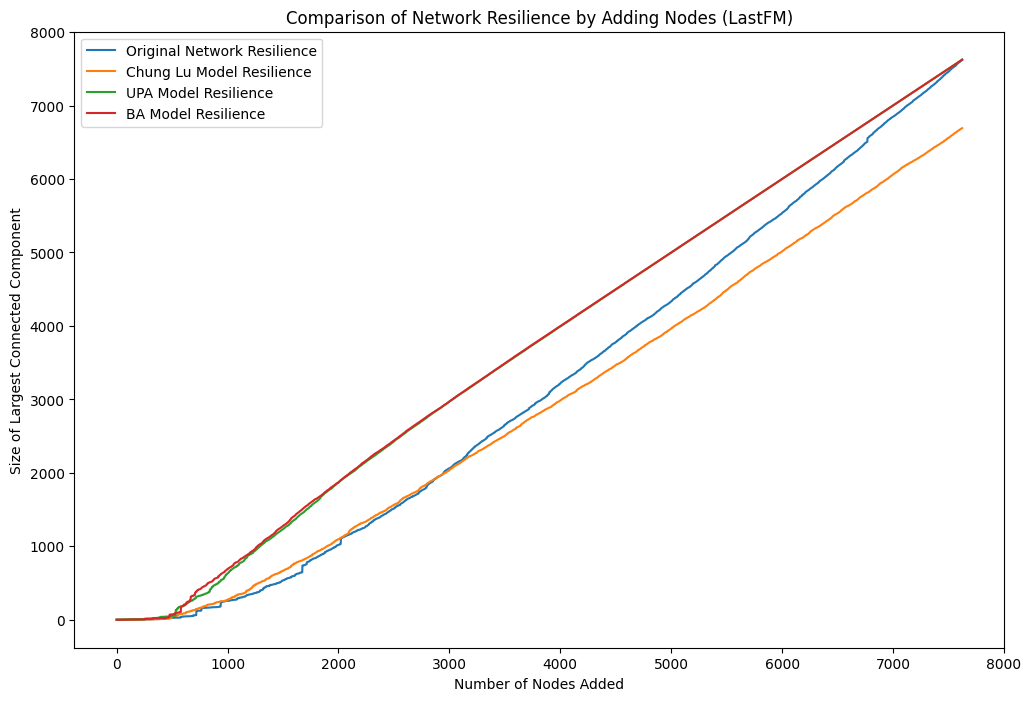

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Function to compute resilience based on random node addition
def random_node_addition(graph):
    nodes = list(graph.nodes())
    random.shuffle(nodes)
    added_graph = nx.Graph()
    largest_cc_size = []
    for node in nodes:
        added_graph.add_node(node)
        for neighbor in graph.neighbors(node):
            if added_graph.has_node(neighbor):
                added_graph.add_edge(node, neighbor)
        if nx.number_connected_components(added_graph) > 0:
            largest_cc = max(nx.connected_components(added_graph), key=len)
            largest_cc_size.append(len(largest_cc))
        else:
            largest_cc_size.append(0)  # If the graph is completely disconnected
    return largest_cc_size

# Assuming lastfm_graph, chung_lu, upa, and ba are already defined as NetworkX graphs
# Compute resilience for random node addition
addition_resilience_lastfm = random_node_addition(lastfm_graph.copy())
addition_resilience_chung_lu = random_node_addition(chung_lu_model_lastfm.copy())
addition_resilience_upa = random_node_addition(upa_model_lastfm.copy())
addition_resilience_ba = random_node_addition(ba_model_lastfm.copy())

# Plotting the resilience
plt.figure(figsize=(12, 8))
plt.plot(addition_resilience_lastfm, label='Original Network Resilience')
plt.plot(addition_resilience_chung_lu, label='Chung Lu Model Resilience')
plt.plot(addition_resilience_upa, label='UPA Model Resilience')
plt.plot(addition_resilience_ba, label='BA Model Resilience')
plt.xlabel('Number of Nodes Added')
plt.ylabel('Size of Largest Connected Component')
plt.title('Comparison of Network Resilience by Adding Nodes (LastFM)')
plt.legend()
plt.show()
